# Математическая статистика
## Практикум 2

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as sps
import ipywidgets as widgets
import matplotlib.pyplot as plt

%matplotlib inline

Укажем вариант и считаем все необходимые значения по заданному варианту группы.

In [2]:
N = 14
# достаем входные данные
data = pd.read_excel('datasets/application_to_practicum2.xlsx').loc[[N]]
o = 10 ** -5 # маленькое число, исключительно для удобства

# функция для преобразования текста в валидный код
def as_function(function):
    return function\
        .replace('x', '*x')\
        .replace('ln', 'np.log')\
        .replace('sin', 'np.sin')\
        .replace('cos', 'np.cos')\
        .replace('tan', 'np.tan')\
        .replace('exp', 'np.exp')\
        .replace('arctan', 'np.arctan')
        
# достаем нужные нам параметры
transcendental_function = as_function(data['Трансцендентная функция'].item())
polynomial = as_function(data['Полином'].item())
gamma = data['Показатель a для Гамма-распределения'].item()
gamma_scale = data['Показатель scale для Гамма-распределения'].item()
μ = data['Показатель \mu_1 для нормального распределения'].item()
σ = data['Показатель \sigma_1 для нормального распределения'].item()

data

,Номер варианта,Трансцендентная функция,Полином,Показатель a для Гамма-распределения,Показатель scale для Гамма-распределения,Показатель \mu_1 для нормального распределения,Показатель \sigma_1 для нормального распределения
14,14,ln(5x),4x^2+3x-2,4.650034,3.432432,2.532169,4.733873


### Задача 1

Смоделировать выборку объема $n=1000$ из распределения Бернулли $Bin(1,p)$, где $p$ соответствует таблице и вашему номеру варианта (приложение 1 к Практикуму2).
Проверить с помощью $\chi^2$ на соответствие данных теоретической модели.

<strong>1. Теоретическая модель</strong>

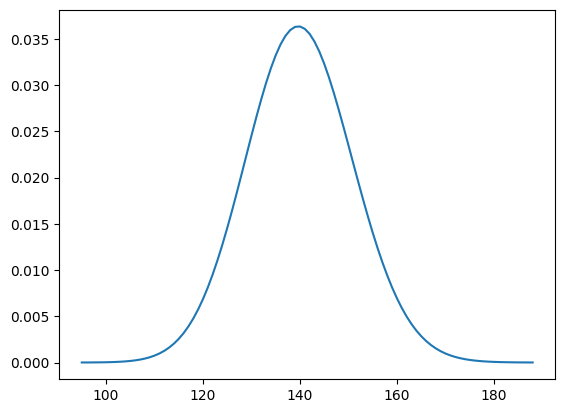

In [3]:
p = N / 100
n = 1000
theory_binom = sps.binom(n, p)

x = np.arange(
    theory_binom.ppf(o),
    theory_binom.ppf(1 - o)
)
pmf = theory_binom.pmf(x)

plt.plot(x, pmf)
plt.show()

<strong>2. Моделирование</strong>

<strong>3. Соответсвие моделей с $\chi^2$</strong>

Проведем $\chi^2$ тест, на соответствие данных теоретической модели.

In [4]:
sps.chisquare(pmf, axis=None)

Power_divergenceResult(statistic=1.4170366529745066, pvalue=1.0)

$p-value > 0.05$, значит мы не можем отбросить гипотезу о их соответствии. 

### Задача 2

Создать  таблицы 100 значений для одной трансцендентной и одной рациональной функции (из приложения 1) в соответствии со своим вариантом. Используя эту таблицу выписать 100 цифр, выбирая из каждого значения функции  второй знак справа от запятой. Для полученной выборки проверить по критерию $\chi^2$ гипотезу о равновероятности получить любую цифру на втором месте после запятой, при уровне значимости 0.01.

<strong>1. Создаем словари</strong>

In [5]:
transcendental_function_table = {}
polynomial_table = {}

N = 100

for x in range(1, N + 1):
    transcendental_function_table[x] = eval(transcendental_function)
    polynomial_table[x] = eval(polynomial)

<strong>2. Трансцендентная функция</strong>

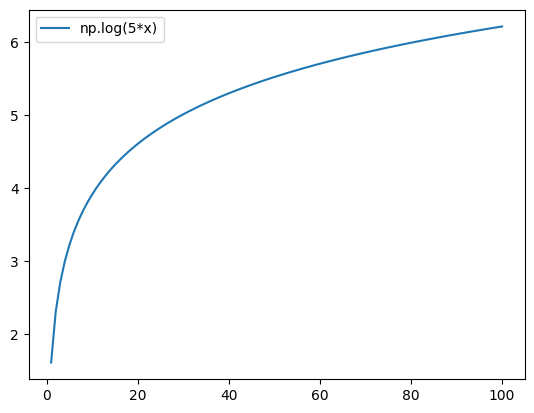

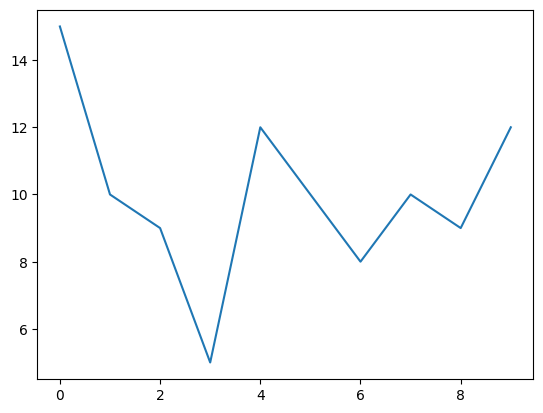

In [17]:
plt.plot(transcendental_function_table.keys(), transcendental_function_table.values(), label = transcendental_function)
plt.legend()
plt.show()

digits_collected = list(map(lambda x: str(x - int(x))[3], transcendental_function_table.values()))
digits_count = {}

for i in range(len(set(digits_collected))):
    digits_count[i] = digits_collected.count(str(i))

plt.plot(digits_count.keys(), digits_count.values())
plt.show()

<strong>3. Рациональная функция</strong>

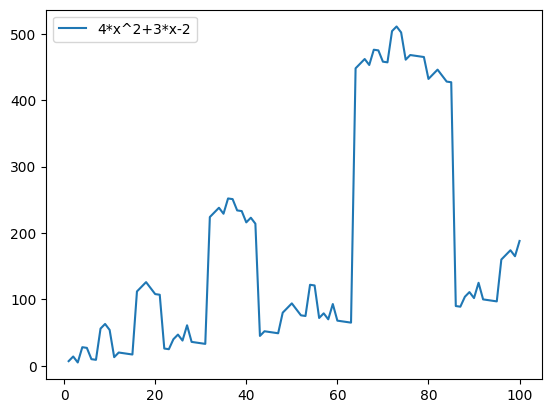

IndexError: string index out of range

In [22]:
plt.plot(polynomial_table.keys(), polynomial_table.values(), label = polynomial)
plt.legend()
plt.show()

digits_collected = list(map(lambda x: str(x - int(x))[3], polynomial_table.values()))
digits_count = {}

for i in range(len(set(digits_collected))):
    digits_count[i] = digits_collected.count(str(i))

plt.plot(digits_count.keys(), digits_count.values())
plt.show()

### Задача 3

Смоделировать первую выборку $X_n$ гамма-распределения с  показателями $a, scale$ (из приложения 1 в соотвтествии с вашим вариантом) объемом 100.
А также вторую выборку $Y_n=X_n+\varepsilon_n$, где $\varepsilon_n$ моделирует ошибку измерения и само является 
выборкой объема 100 нормального распределения со средним $\mu=0$ и отклонением $\sigma=scale/4$.  Проверить критерием Колмогорова-Смирнова (https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.kstest.html) гипотезу о том, что выборка $X_n $ согласуется с гипотезой о $ \Gamma$-распределении, и что выборки  $X_n$ и $Y_n$ однородны, то есть принадлежат одному распределению.

### Задача 4

Смоделировать выборку вида $X_n+\varepsilon_n$, где $X_n$-распределено нормально с  показателями $\mu_1$ и отклонением $\sigma_1$ (из приложения 1 в соотвтествии с вашим вариантом), $\varepsilon_n$ моделирует 
ошибку измерения и само является 
выборкой нормального распределения со средним $\mu_2=0$ и отклонением $\sigma_2$. Протестировать на нормальность полученную выборку.

Проиллюстрировать графически зависимость результатов тестирования от объема выборки при $\sigma_2=\sigma_1/i$, где i пробегает множество натуральных чисел меньших 20.
